<a href="https://colab.research.google.com/github/Ethy17/CPE019-CPE32S9/blob/main/Hands_on_Activity_6_2_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Kristian Marc P. Dayrit

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [136]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [137]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [138]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
638,7,97,76,32,91,40.9,0.871,32,1
44,7,159,64,0,0,27.4,0.294,40,0
207,5,162,104,0,0,37.7,0.151,52,1
509,8,120,78,0,0,25.0,0.409,64,0
692,2,121,70,32,95,39.1,0.886,23,0


In [139]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [140]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [142]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [143]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [144]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [145]:

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12)                108       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [146]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 18ms/step - loss: 0.8077 - accuracy: 0.4983 - val_loss: 0.8151 - val_accuracy: 0.5156
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7831 - accuracy: 0.5347 - val_loss: 0.7892 - val_accuracy: 0.5469
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7619 - accuracy: 0.5625 - val_loss: 0.7670 - val_accuracy: 0.5677
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7435 - accuracy: 0.5903 - val_loss: 0.7474 - val_accuracy: 0.5833
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7274 - accuracy: 0.6059 - val_loss: 0.7303 - val_accuracy: 0.5990
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.6181 - val_loss: 0.7152 - val_accuracy: 0.6094
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7004 - accuracy: 0.6302 - val_loss: 0.7017 - val_accuracy: 0.6042
Epoch 8/200


In [147]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 5ms/step


In [148]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [149]:
y_pred_prob_nn_1[:10]

array([[0.58750594],
       [0.6804376 ],
       [0.28522703],
       [0.23143695],
       [0.16816118],
       [0.52589536],
       [0.02137552],
       [0.32752517],
       [0.9220571 ],
       [0.22163317]], dtype=float32)

Create the plot_roc function

In [150]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.813


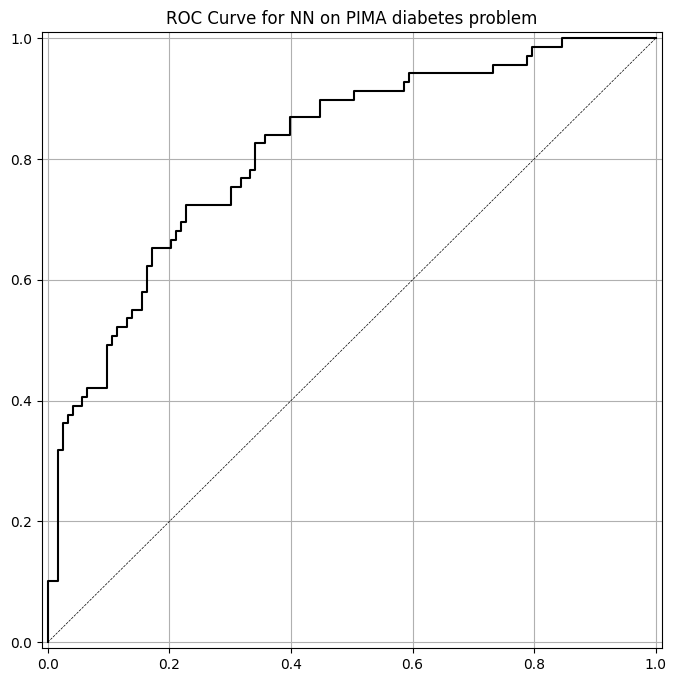

In [151]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [152]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

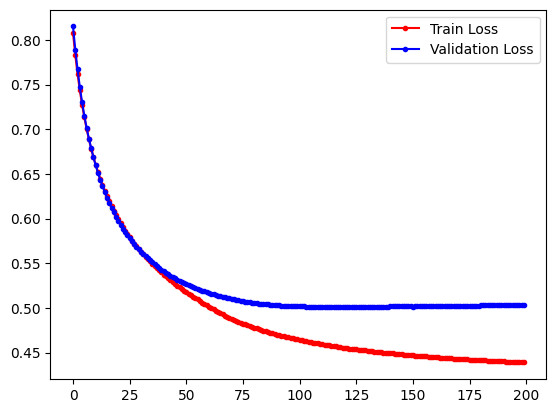

In [153]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

My interpretation about the result is that as the amount of epoch increases the lower the train loss and the stable the validation loss becomes and it indicates that the model is learning the data patterns effectively.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [166]:
#Build a model with two hidden layers, each with 6 nodes
#Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [155]:
#Use a learning rate of .003 and train for 1500 epochs
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 2s 31ms/step - loss: 0.7666 - accuracy: 0.3785 - val_loss: 0.7493 - val_accuracy: 0.4062
Epoch 2/1500
18/18 [==============================] - 0s 9ms/step - loss: 0.7413 - accuracy: 0.4149 - val_loss: 0.7293 - val_accuracy: 0.4531
Epoch 3/1500
18/18 [==============================] - 0s 13ms/step - loss: 0.7216 - accuracy: 0.4549 - val_loss: 0.7141 - val_accuracy: 0.4688
Epoch 4/1500
18/18 [==============================] - 0s 11ms/step - loss: 0.7059 - accuracy: 0.4983 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 5/1500
18/18 [==============================] - 0s 12ms/step - loss: 0.6929 - accuracy: 0.5486 - val_loss: 0.6917 - val_accuracy: 0.5052
Epoch 6/1500
18/18 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.5903 - val_loss: 0.6831 - val_accuracy: 0.5260
Epoch 7/1500
18/18 [==============================] - 0s 16ms/step - loss: 0.6729 - accuracy: 0.5920 - val_loss: 0.6754 - val_accuracy: 0.5417


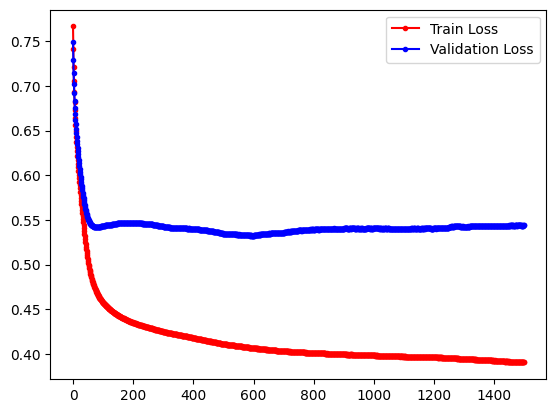

In [156]:
#Graph the trajectory of the loss functions, accuracy on both train and test set

run_hist_1.history.keys()
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

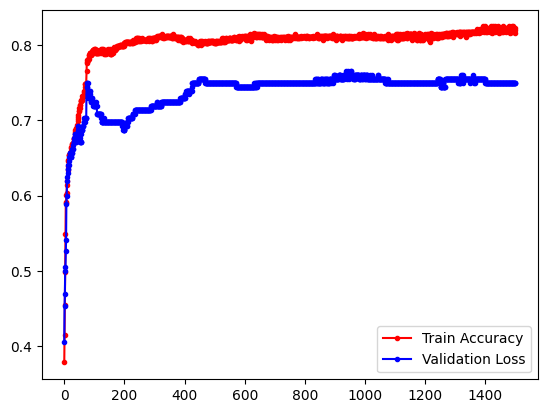

In [157]:
run_hist_1.history.keys()
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation Loss")
ax.legend()

6/6 [==============================] - 0s 2ms/step
accuracy is 0.750
roc-auc is 0.800


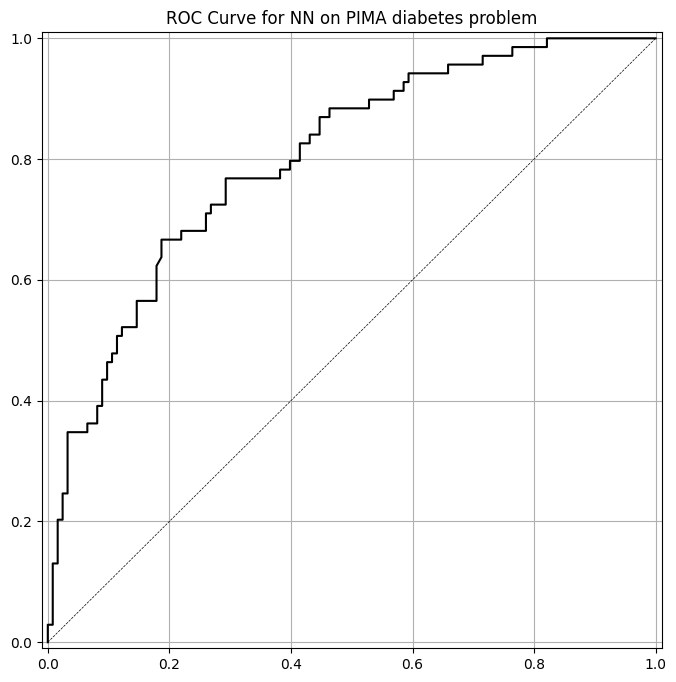

In [158]:
#Plot the roc curve for the predictions

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [164]:
#Use different learning rates, numbers of epochs, and network structures.
model.compile(SGD(lr = .05), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 15ms/step - loss: 0.6662 - accuracy: 0.6667 - val_loss: 0.6817 - val_accuracy: 0.6458
Epoch 2/500
18/18 [==============================] - 0s 6ms/step - loss: 0.6425 - accuracy: 0.6632 - val_loss: 0.6604 - val_accuracy: 0.6458
Epoch 3/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6240 - accuracy: 0.6684 - val_loss: 0.6437 - val_accuracy: 0.6510
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6090 - accuracy: 0.6719 - val_loss: 0.6303 - val_accuracy: 0.6615
Epoch 5/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5965 - accuracy: 0.6788 - val_loss: 0.6193 - val_accuracy: 0.6667
Epoch 6/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.6858 - val_loss: 0.6103 - val_accuracy: 0.6667
Epoch 7/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5770 - accuracy: 0.6927 - val_loss: 0.6025 - val_accuracy: 0.6719
Epoch 8/500


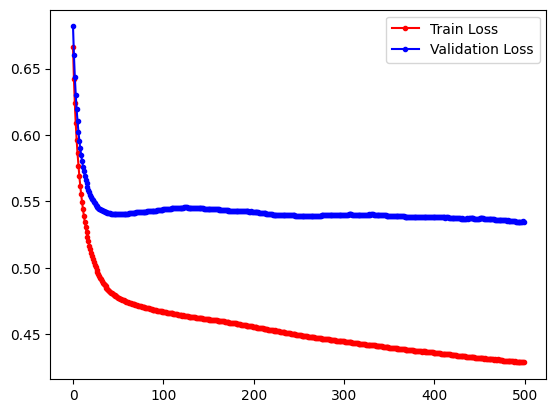

In [165]:
#Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
run_hist_1.history.keys()
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [167]:
#Use different learning rates, numbers of epochs, and network structures.
model.compile(SGD(lr = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 16ms/step - loss: 0.7371 - accuracy: 0.3750 - val_loss: 0.7277 - val_accuracy: 0.3854
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.7183 - accuracy: 0.4010 - val_loss: 0.7135 - val_accuracy: 0.4635
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.4878 - val_loss: 0.7014 - val_accuracy: 0.5312
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.5382 - val_loss: 0.6906 - val_accuracy: 0.5677
Epoch 5/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.6094 - val_loss: 0.6812 - val_accuracy: 0.6406
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.6712 - accuracy: 0.6597 - val_loss: 0.6731 - val_accuracy: 0.6458
Epoch 7/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.6633 - accuracy: 0.6823 - val_loss: 0.6660 - val_accuracy: 0.6771
Epoch

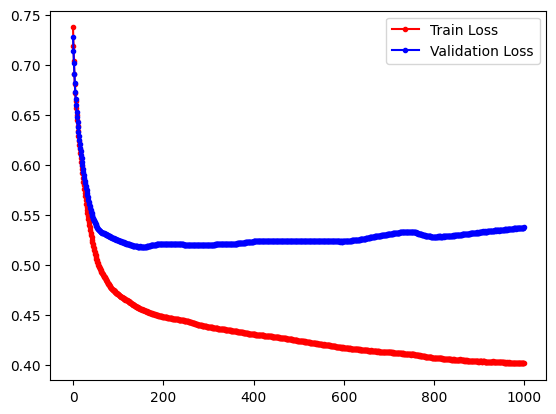

In [168]:
#Plot the results of training and validation loss using different learning rates, number of epochs and network structures
run_hist_1.history.keys()
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Interpret your result:
My interpretation towards the result of my chosen different learning rates and number of epoch shows that the model doesnt have much notable changes towards the train loss and validation loss.

#### Conclusion

in Conclusion this activity has helped me understand on the different learning models and training neural networks wherein i also learn to distinguish and interpret the results of the models and whenever the model is accurate in representing the data and variables.